In [181]:
import osmnx as ox
import networkx as nx
import pickle 
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare, describe
import matplotlib.patches as mpatches
from scipy.sparse import spdiags
from scipy.linalg import eigh
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
import multiprocessing

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 11

path = 'Data'
os.chdir('C:/Users/Besitzer/Desktop/Geospatial Analysis/')

In [6]:
path = 'C:/Users/Besitzer/Desktop/Geospatial Analysis/Data'
corr_data = pd.DataFrame(index=['n', 'm', 'k_avg', 'intersection_count', 'streets_per_node_avg', 'edge_length_total',
         'edge_length_avg', 'street_length_total', 'street_length_avg', 'street_segments_count',
         'node_density_km', 'intersection_density_km', 'edge_density_km', 'street_density_km',
         'circuity_avg', 'self_loop_proportion', 'avg_neighbor_degree_avg', 'avg_weighted_neighbor_degree_avg',
         'degree_centrality_avg', 'clustering_coefficient_avg', 'clustering_coefficient_weighted_avg',
         'diameter', 'radius', 'closeness_centrality_avg', 'betweenness_centrality_avg', 'oneway', 'oneway_proportion'])
for file in os.listdir(path):
    #print(file.replace('.pkl',''))
    data = pd.read_pickle(path + '/' + file)
    data['oneway_proportion'] = data['oneway'] / data['m']
    data = data[corr_data.index]
    data = data.to_frame(name=file.replace('.pkl',''))
    corr_data = pd.concat([corr_data, data],axis=1)

In [22]:
corr_data.head(7)

,Amsterdam,Antwerp,Barcelona,Basel,Berlin,Bilbao,Bologna,Bonn,Bordeaux,Bremen,...,Stuttgart,Tokyo,Toronto,Toulouse,Turin,Utrecht,Valencia,Vienna,Warsaw,Zurich
n,6297,4143,6735,3848,3373,3278,3936,3309,5993,2652,...,3499,19289,2988,5991,7568,6025,6986,5639,3091,3772
m,13759,9074,12537,9241,8251,6259,7745,7769,12842,5923,...,8022,50021,8413,13086,16538,13800,12780,11709,6419,8640
k_avg,4.37002,4.3804,3.72294,4.80301,4.89238,3.81879,3.93547,4.69568,4.28567,4.46682,...,4.58531,5.18648,5.63119,4.36855,4.37051,4.58091,3.65875,4.15286,4.15335,4.58112
intersection_count,5679,3791,6289,3446,3114,2882,3382,2784,5539,2396,...,2930,16158,2689,5429,7156,5210,6566,5278,2695,3316
streets_per_node_avg,3.03637,3.02921,3.22079,2.95764,3.17521,2.86211,2.84858,2.81596,3.03638,2.9819,...,2.86368,2.79983,3.09003,2.90953,3.29162,2.88166,3.13226,3.22132,2.9408,2.90483
edge_length_total,1.22764e+06,947458,1.13302e+06,1.03969e+06,1.02001e+06,740502,803583,895619,1.14262e+06,707953,...,924927,2.74327e+06,1.1781e+06,1.21613e+06,1.40327e+06,1.24079e+06,1.12277e+06,1.10184e+06,771951,950099
edge_length_avg,89.2247,104.415,90.374,112.509,123.623,118.31,103.755,115.281,88.9753,119.526,...,115.299,54.8423,140.033,92.9335,84.851,89.912,87.8535,94.1021,120.26,109.965


In [158]:
epsilon = pd.read_pickle('Epsilon_Balls.pkl')
edge = pd.read_pickle('Edges_Length_Geometry.pkl')

In [24]:
mean_geometry_index = []
for i in range(len(edge)):
    mean_geometry_index.append(np.mean(edge[i]['geometry index']))

In [30]:
dist_pro = []
for file in os.listdir('Distance'):
    if 'distance_pro' in file:
        dist_pro.append(pd.read_pickle('Distance/' + file))

In [36]:
center_dist = []
for i in range(len(dist_pro)):
    center_dist.append(dist_pro[i][0][0])

In [40]:
dist_dist = []
for file in os.listdir('Distance'):
    if 'distance_dist' in file:
        dist_dist.append(pd.read_pickle('Distance/' + file))

In [130]:
proportion_3750m = []
for i in range(len(dist_dist)):
    dist_dist[i][0][0] = [x for x in dist_dist[i][0][0] if x != np.inf]
    proportion_3750m.append(len([value for value in dist_dist[i][0][0] if value > 3750]) / len(dist_dist[i][0][0]))

(array([2., 1., 0., 0., 0., 3., 2., 3., 2., 1., 1., 3., 2., 4., 6., 6., 4.,
        5., 2., 1., 2., 2., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.31335357, 0.32597892, 0.33860427, 0.35122962, 0.36385497,
        0.37648032, 0.38910568, 0.40173103, 0.41435638, 0.42698173,
        0.43960708, 0.45223243, 0.46485778, 0.47748314, 0.49010849,
        0.50273384, 0.51535919, 0.52798454, 0.54060989, 0.55323524,
        0.5658606 , 0.57848595, 0.5911113 , 0.60373665, 0.616362  ,
        0.62898735, 0.64161271, 0.65423806, 0.66686341, 0.67948876,
        0.69211411, 0.70473946, 0.71736481, 0.72999017, 0.74261552,
        0.75524087, 0.76786622, 0.78049157, 0.79311692, 0.80574227,
        0.81836763, 0.83099298, 0.84361833, 0.85624368, 0.86886903,
        0.88149438, 0.89411974, 0.90674509, 0.91937044, 0.93199579,
        0.94462114]),
 <BarContainer object of 50 artists>)

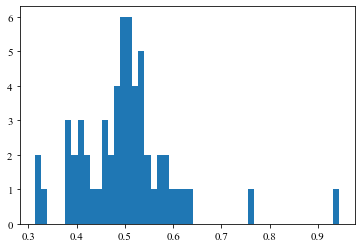

In [131]:
plt.hist(proportion_3750m,bins=50)

In [140]:
entropy = pd.read_pickle('Entropy.pkl')

In [154]:
entropy.loc['t_w_9']

Amsterdam        0.087738
Antwerp          0.035202
Barcelona        0.160475
Basel            0.008463
Berlin           0.032885
Bilbao           0.012439
Bologna          0.093424
Bonn             0.044454
Bordeaux         0.007357
Bremen           0.079985
Brisbane         0.175675
Bristol          0.010083
Brussels         0.026510
Budapest         0.111589
Cologne          0.019803
Dublin           0.035631
Düsseldorf       0.013163
Frankfurt        0.048953
Geneva           0.040416
Hanover          0.059562
Helsinki         0.016804
Karlsruhe        0.067922
Katowice         0.079109
Kraków           0.015263
Linz             0.047259
Lisbon           0.026434
London           0.043853
Lyon             0.059391
Madrid           0.062024
Manhattan        0.651296
Mannheim         0.040353
Milan            0.047153
Montreal         0.589175
Munich           0.089105
Nagoya           0.266775
Naples           0.014570
Newcastle        0.022161
Nuremberg        0.014191
Osaka       

In [276]:
def optimal_cluster(x):
    prog = []
    city_list = []
    for file in os.listdir('Distance'):
        if 'distance_pro_' in file:
            city_list.append(file.replace('distance_pro_', '').replace('.pkl',''))
            data = pd.read_pickle('Distance/' + file)
            prog.append(data[0])
    percent = []
    for i in range(6):
        percent.append((1-x)**i)
    cluster = []
    for j in range(58):
        li = []
        for i in range(6):
            li.append(prog[j][i] / percent[i])
        cluster.append(li.index(min(li))+1)
    cluster = pd.Series(cluster, index=city_list)
    return cluster
cluster = optimal_cluster(0.15) #bremen als beispiel, newcastle, antwerp, krakov

In [279]:
cluster.T

Amsterdam        2
Antwerp          5
Barcelona        2
Basel            2
Berlin           4
Bilbao           3
Bologna          3
Bonn             5
Bordeaux         3
Bremen           6
Brisbane         2
Bristol          3
Brussels         3
Budapest         4
Cologne          3
Dublin           4
Düsseldorf       3
Frankfurt        3
Geneva           4
Hanover          4
Helsinki         4
Karlsruhe        2
Katowice         3
Kraków           1
Linz             3
Lisbon           3
London           3
Lyon             3
Madrid           4
Manhattan        4
Mannheim         2
Milan            4
Montreal         3
Munich           4
Nagoya           3
Naples           5
Newcastle        2
Nuremberg        2
Osaka            3
Paris            3
Portland         3
Prague           4
Rome             3
Saarbrücken      2
San Francisco    3
Santiago         3
Seoul            3
Seville          3
Stuttgart        3
Tokyo            3
Toronto          3
Toulouse         2
Turin       

In [280]:
df = pd.DataFrame([epsilon, mean_geometry_index, center_dist, proportion_3750m, entropy.loc['t_w_9'], cluster], columns=corr_data.columns, index=['epsilon_balls', 'mean_geometry_index', 'center_distance', 'proportion>3.75km', 'theta9_weighted', 'optimal_cluster'])

In [165]:
df.loc['epsilon_balls'] = df.loc['epsilon_balls'].astype(int)

In [281]:
df

,Amsterdam,Antwerp,Barcelona,Basel,Berlin,Bilbao,Bologna,Bonn,Bordeaux,Bremen,...,Stuttgart,Tokyo,Toronto,Toulouse,Turin,Utrecht,Valencia,Vienna,Warsaw,Zurich
epsilon_balls,105.000000,361.000000,228.000000,316.000000,167.000000,695.000000,290.000000,330.000000,58.000000,729.000000,...,452.000000,0.000000,108.000000,85.000000,51.000000,190.000000,92.000000,100.000000,282.000000,538.000000
mean_geometry_index,3.213533,3.487437,3.438622,4.263067,4.597019,5.641317,4.112589,4.885313,3.475860,4.455344,...,4.894415,1.872254,3.483656,4.051276,2.641250,2.775290,2.554460,3.117260,4.832996,4.857986
center_distance,4016.968932,3427.353199,3936.944174,3395.690434,3688.028469,3639.876309,3626.659037,3925.127227,3618.521273,3092.704256,...,3624.817720,3555.254139,3875.284123,3602.852810,3269.213074,3706.868885,3468.436661,3718.880911,3719.663953,3150.597365
proportion>3.75km,0.531946,0.455897,0.534478,0.406430,0.509675,0.414017,0.481644,0.567428,0.506530,0.313354,...,0.406672,0.472136,0.514978,0.459478,0.382306,0.525892,0.437345,0.494197,0.533663,0.335113
theta9_weighted,0.087738,0.035202,0.160475,0.008463,0.032885,0.012439,0.093424,0.044454,0.007357,0.079985,...,0.012307,0.052545,0.568167,0.002819,0.215187,0.029398,0.113255,0.030542,0.118620,0.020360
optimal_cluster,2.000000,5.000000,2.000000,2.000000,4.000000,3.000000,3.000000,5.000000,3.000000,6.000000,...,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [282]:
cor = pd.concat([corr_data, df]).T
cor = cor.astype(float)

In [283]:
cor.head()

,n,m,k_avg,intersection_count,streets_per_node_avg,edge_length_total,edge_length_avg,street_length_total,street_length_avg,street_segments_count,...,closeness_centrality_avg,betweenness_centrality_avg,oneway,oneway_proportion,epsilon_balls,mean_geometry_index,center_distance,proportion>3.75km,theta9_weighted,optimal_cluster
Amsterdam,6297.0,13759.0,4.370017,5679.0,3.036367,1227643.068,89.224731,887419.701,93.629426,9478.0,...,0.000192,0.008515,5197.0,0.377716,105.0,3.213533,4016.968932,0.531946,0.087738,2.0
Antwerp,4143.0,9074.0,4.380401,3791.0,3.029206,947458.016,104.414593,662456.055,106.727252,6207.0,...,0.000216,0.010234,3340.0,0.368085,361.0,3.487437,3427.353199,0.455897,0.035202,5.0
Barcelona,6735.0,12537.0,3.722940,6289.0,3.220787,1133018.966,90.374010,974448.311,90.747654,10738.0,...,0.000207,0.007921,8939.0,0.713009,228.0,3.438622,3936.944174,0.534478,0.160475,2.0
Basel,3848.0,9241.0,4.803015,3446.0,2.957640,1039694.929,112.508920,624101.824,110.833213,5631.0,...,0.000224,0.011945,2021.0,0.218699,316.0,4.263067,3395.690434,0.406430,0.008463,2.0
Berlin,3373.0,8251.0,4.892381,3114.0,3.175215,1020009.812,123.622568,647284.335,122.129120,5300.0,...,0.000207,0.012006,2349.0,0.284693,167.0,4.597019,3688.028469,0.509675,0.032885,4.0


<AxesSubplot:>

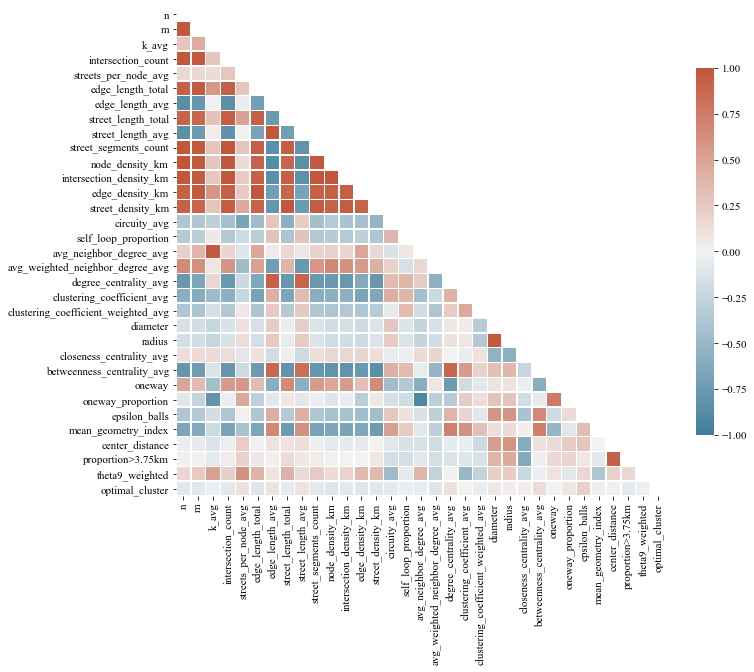

In [284]:
# Compute the correlation matrix
corr = cor.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

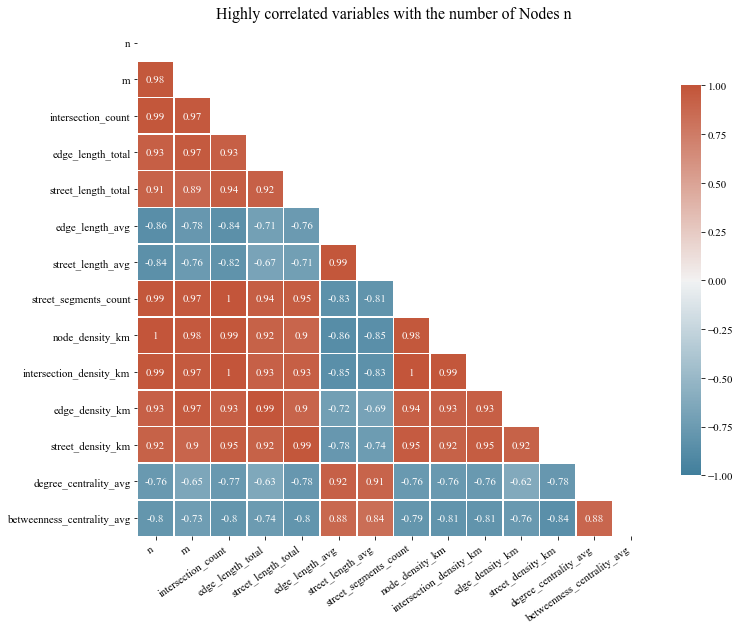

In [288]:
corr = cor[['n', 'm', 'intersection_count', 'edge_length_total', 'street_length_total', 'edge_length_avg', 'street_length_avg', 'street_segments_count',
    'node_density_km', 'intersection_density_km', 'edge_density_km', 'street_density_km','degree_centrality_avg', 'betweenness_centrality_avg']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75}, annot=True)
plt.xticks(rotation=35, horizontalalignment='right') 
plt.title('Highly correlated variables with the number of Nodes n', size=16)
plt.tight_layout()
plt.savefig('Plots/perfect_correlation.pdf')

,n,m,intersection_count,edge_length_total,street_length_total,street_length_avg,street_segments_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,degree_centrality_avg,betweenness_centrality_avg
n,1.000000,0.979338,0.990744,0.930709,0.909560,-0.836824,0.988921,0.997418,0.989100,0.929418,0.917163,-0.764181,-0.796007
m,0.979338,1.000000,0.971705,0.967424,0.888977,-0.755476,0.972696,0.975334,0.968585,0.967006,0.895024,-0.653477,-0.732173
intersection_count,0.990744,0.971705,1.000000,0.934547,0.943204,-0.819987,0.999157,0.986792,0.997262,0.931063,0.949193,-0.765362,-0.795948
edge_length_total,0.930709,0.967424,0.934547,1.000000,0.924553,-0.674108,0.941408,0.921434,0.926214,0.992197,0.920881,-0.633077,-0.742644
street_length_total,0.909560,0.888977,0.943204,0.924553,1.000000,-0.711641,0.950752,0.896150,0.931053,0.904479,0.986189,-0.776799,-0.804601
street_length_avg,-0.836824,-0.755476,-0.819987,-0.674108,-0.711641,1.000000,-0.810000,-0.846213,-0.830309,-0.685736,-0.737861,0.905624,0.836162
street_segments_count,0.988921,0.972696,0.999157,0.941408,0.950752,-0.810000,1.000000,0.983787,0.995188,0.936010,0.954187,-0.761519,-0.793372
node_density_km,0.997418,0.975334,0.986792,0.921434,0.896150,-0.846213,0.983787,1.000000,0.990458,0.928932,0.915429,-0.762544,-0.807329
intersection_density_km,0.989100,0.968585,0.997262,0.926214,0.931053,-0.830309,0.995188,0.990458,1.000000,0.931794,0.949155,-0.764512,-0.809065
edge_density_km,0.929418,0.967006,0.931063,0.992197,0.904479,-0.685736,0.936010,0.928932,0.931794,1.000000,0.921340,-0.622872,-0.761536


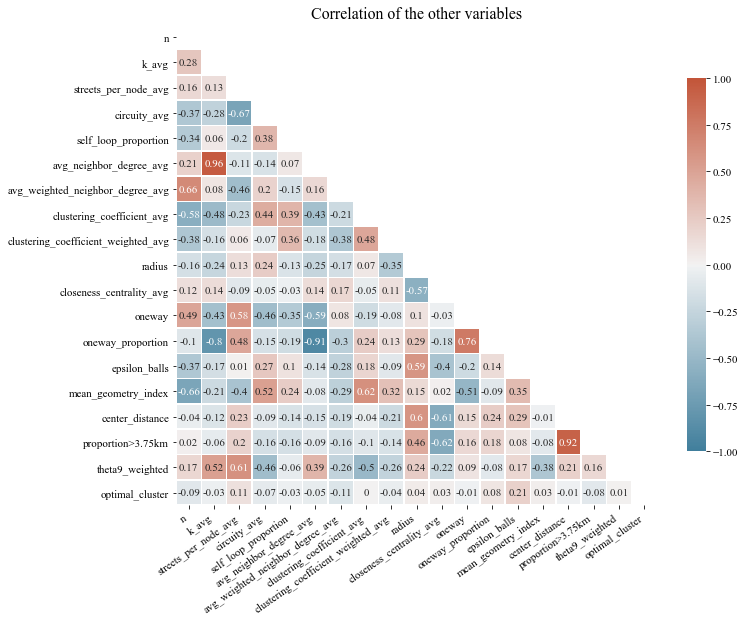

In [289]:
corr = cor.drop(['m', 'intersection_count', 'diameter', 'edge_length_total', 'street_length_total', 'edge_length_avg', 'street_length_avg', 'street_segments_count',
        'node_density_km', 'intersection_density_km', 'edge_density_km', 'street_density_km','degree_centrality_avg', 'betweenness_centrality_avg'],axis=1).corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75}, annot=True)
plt.xticks(rotation=35, horizontalalignment='right') 
plt.title('Correlation of the other variables', size=16)
plt.tight_layout()
plt.savefig('Plots/correlation.pdf')

          - n = number of nodes in the graph
          - m = number of edges in the graph
          - k_avg = average node degree of the graph
          - intersection_count = number of intersections in graph, that is,
                nodes with >1 physical street connected to them
          - streets_per_node_avg = how many physical streets (edges in the
                undirected representation of the graph) connect to each node
                (ie, intersection or dead-end) on average (mean)
          - streets_per_node_counts = dict with keys of number of physical
                streets connecting to a node, and values of number of nodes
                with this count
          - streets_per_node_proportion = dict, same as previous, but as a
                proportion of the total, rather than counts
          - edge_length_total = sum of all edge lengths in graph, in meters
          - edge_length_avg = mean edge length in the graph, in meters
          - street_length_total = sum of all edges in the undirected
                representation of the graph
          - street_length_avg = mean edge length in the undirected
                representation of the graph, in meters
          - street_segments_count = number of edges in the undirected
                representation of the graph
          - node_density_km = n divided by area in square kilometers
          - intersection_density_km = intersection_count divided by area in
                square kilometers
          - edge_density_km = edge_length_total divided by area in square
                kilometers
          - street_density_km = street_length_total divided by area in square
                kilometers
          - circuity_avg = edge_length_total divided by the sum of the great
                circle distances between the nodes of each edge
          - self_loop_proportion = proportion of edges that have a single node
                as its endpoints (ie, the edge links nodes u and v, and u==v)
          - clean_intersection_count = number of intersections in street
                network, merging complex ones into single points
          - clean_intersection_density_km = clean_intersection_count divided
                by area in square kilometers

In [247]:
cluster

[4,
 4,
 3,
 4,
 3,
 2,
 2,
 4,
 2,
 5,
 1,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 4,
 3,
 2,
 2,
 2,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 4,
 1,
 1,
 3,
 3,
 2,
 3,
 3,
 4,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 2]